# Introduction

***Motivation***

This notebook utilizes a dataset containing the results of the chemical analysis of Italian wines to explore the **influence of dimensionality reduction on clustering results**. K-means is used (i) **without any** prior dimensionality reduction, (ii) with prior dimensionality reduction via principal component analysis (**PCA**), and (iii) with prior dimensionality reduction via **UMAP**. All other aspects are kept deliberately simple.


***Link to dataset***

https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering


***Data dictionary (from above source)***

Features (all numercial):
- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline


**Imports and global settings**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.decomposition import PCA
import umap

from sklearn.cluster import KMeans

import random

std_figure_size = (8,5)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

fixed_random_state = random.seed(42)

%config IPCompleter.use_jedi=False

**Reading in the dataset**

In [2]:
df = pd.read_csv("../input/wine-dataset-for-clustering/wine-clustering.csv")

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Any duplicate rows?**

In [3]:
n_dup = len(df) - len(df.drop_duplicates())

print(f"Number of duplicate rows: {n_dup}")

Number of duplicate rows: 0


**Any missing values?**

In [4]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

**Checking data types**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


**Cleaning up column names (mainly for handling purposes)**

In [6]:
cols_cleaned = []

for col in df.columns:
    cols_cleaned.append(col.strip().lower())
    
df.columns = cols_cleaned

# sanity check
df.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Quick overview over the individual distributions**

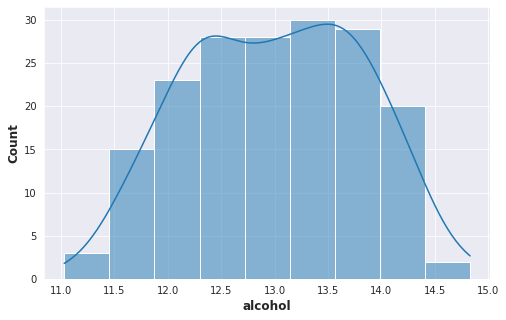

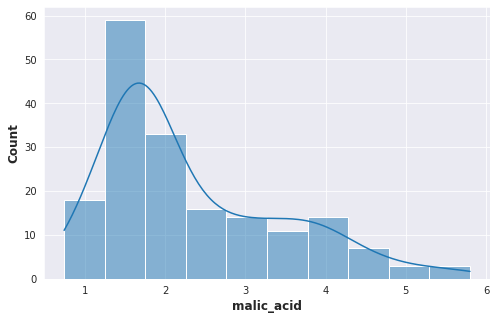

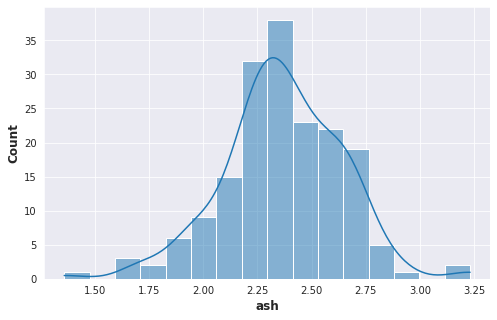

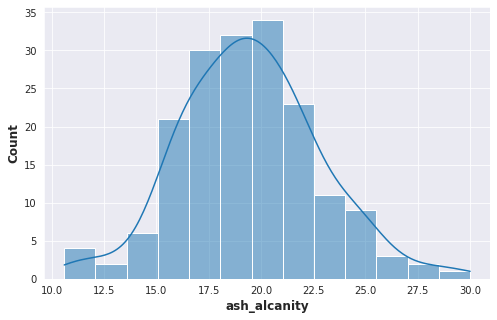

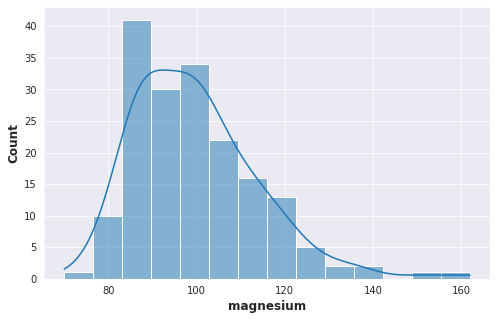

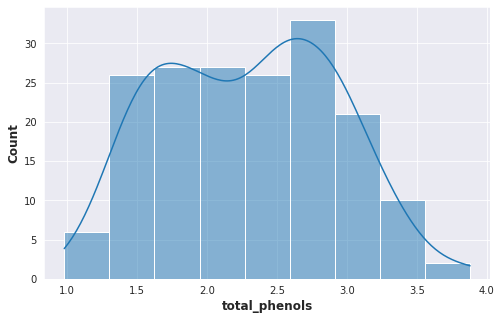

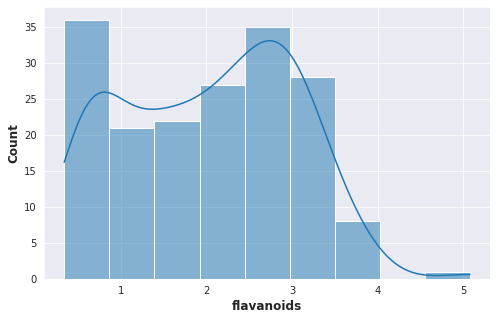

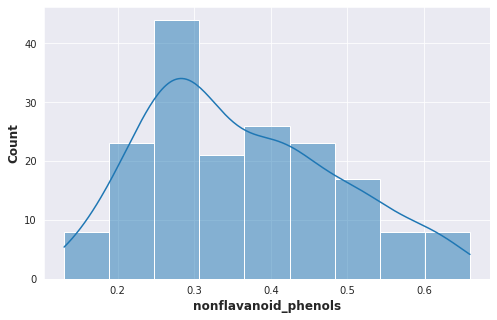

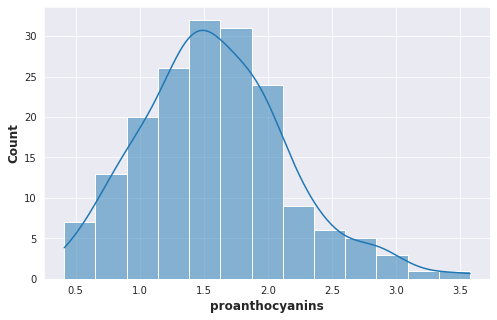

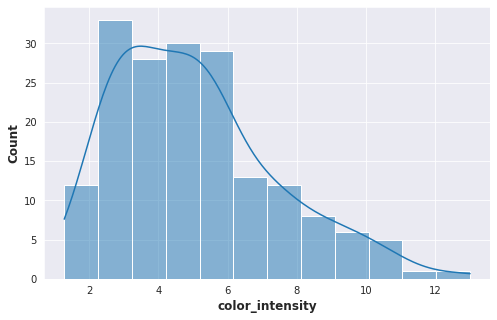

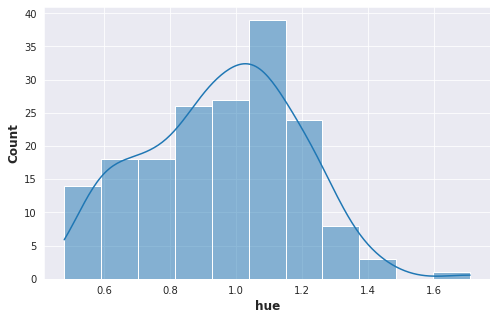

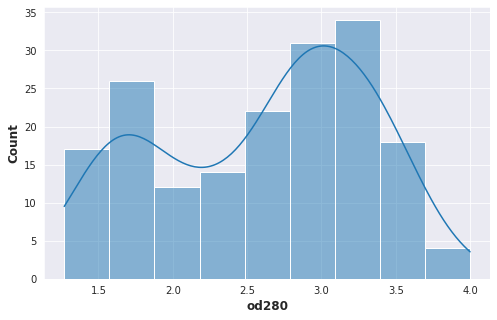

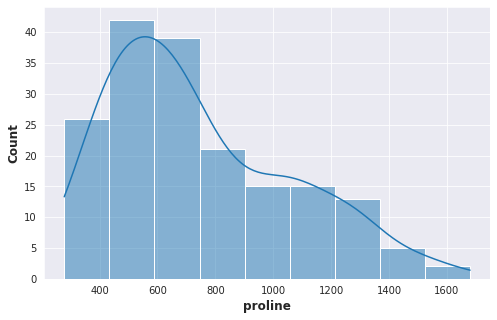

In [7]:
for col in df.columns:
    fig, axs = plt.subplots(figsize=std_figure_size)
    sns.histplot(data=df, x=col, kde=True, ax=axs)
    plt.show()

===> distributions require scaling and standardization

In [8]:
X = df.copy()

# Clustering

## Scaling and Standardizing

In [9]:
X = StandardScaler().fit_transform(df)

In [10]:
X = PowerTransformer(standardize=False).fit_transform(X)

In [11]:
X = pd.DataFrame(X, columns=df.columns)

# sanity check
X.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.552972,-0.702436,0.233769,-1.224710,1.378174,0.796708,1.043661,-0.729831,1.093141,0.235133,0.363665,2.262034,0.793386
1,0.247472,-0.610198,-0.809540,-2.696922,0.018056,0.562211,0.738364,-0.926936,-0.578400,-0.317844,0.407900,1.278188,0.762788
2,0.197645,0.021031,1.141607,-0.272253,0.086325,0.796708,1.227314,-0.539574,1.802679,0.250223,0.319467,0.875251,1.022728
3,1.732995,-0.400457,0.495037,-0.837478,0.767296,2.405004,1.482916,-1.130495,0.934182,0.921471,-0.425517,1.368576,1.500126
4,0.297382,0.207225,1.919073,0.442690,1.001563,0.796708,0.667285,0.218295,0.383679,-0.348242,0.363665,0.479405,-0.038337


## Attempt 1: K-means without any prior dimensionality reduction

**Identifying the "optimal" number of clusters**

In [12]:
inertias_1 = []
range_clusters_1 = np.arange(2, 10, dtype=int)

for n in range_clusters_1:
    kmeans_1 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(X)
    inertias_1.append(kmeans_1.inertia_)
    
# inertias_1

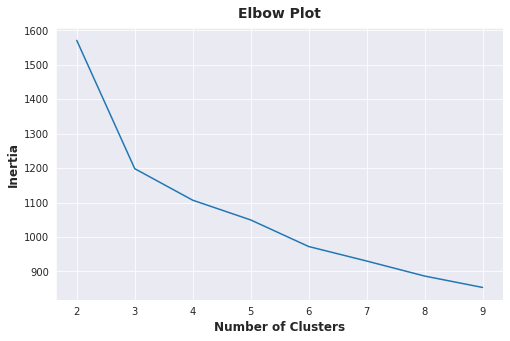

In [13]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_1, y=inertias_1)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
# plt.ylim(bottom=0)
plt.show()

===> "kink" at 3 clusters

**Clustering**

In [14]:
labels_1 = KMeans(n_clusters=3, random_state=fixed_random_state).fit_predict(X)

Reduction to 2 dimensions *after* clustering so to be able to plot the results

In [15]:
reducer_1 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=fixed_random_state)
embedding_1 = reducer_1.fit_transform(X)

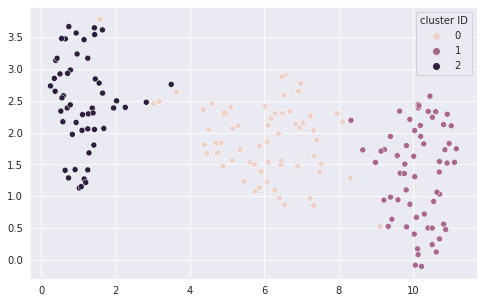

In [16]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_1[:, 0], y=embedding_1[:, 1], hue=labels_1)
plt.legend(title="cluster ID")
plt.show()

===> Results seem reasonable. Minor "overlaps".

## Attempt 2: K-means with prior dimensionality reduction via PCA

**Identifying the "optimal" number of (principal) components to keep**

In [17]:
pca_2 = PCA(n_components=10, random_state=fixed_random_state).fit(X)

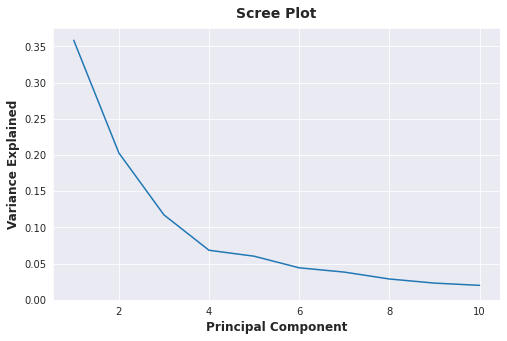

In [18]:
princ_comps_2 = np.arange(pca_2.n_components_, dtype=int) + 1

fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=princ_comps_2, y=pca_2.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(bottom=0)
plt.show()

===> "kink" at 4 components

**Reduction to 4 dimensions**

In [19]:
X_red_2 = PCA(n_components=4, random_state=fixed_random_state).fit_transform(X)

In [20]:
X_red_2 = pd.DataFrame(X_red_2, columns=["pc1", "pc2", "pc3", "pc4"])

X_red_2.head()

,pc1,pc2,pc3,pc4
0,-3.361355,-1.335128,-0.241050,0.034622
1,-2.232559,0.183505,-2.117771,-0.314983
2,-2.361378,-1.061396,1.076760,0.495528
3,-3.661182,-2.383114,-0.072985,0.715901
4,-0.977118,-1.100360,2.028880,-0.459807


**Identifying the "optimal" number of clusters**

In [21]:
inertias_2 = []
range_clusters_2 = np.arange(2, 10, dtype=int)

for n in range_clusters_2:
    kmeans_2 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(X_red_2)
    inertias_2.append(kmeans_2.inertia_)
    
# inertias_2

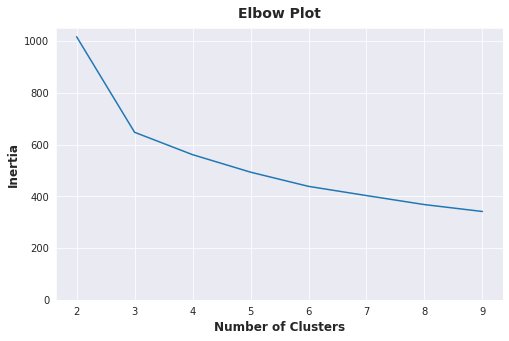

In [22]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_2, y=inertias_2)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ylim(bottom=0)
plt.show()

===> "kink" at 3 clusters

**Clustering on dataset with reduced dimensions**

In [23]:
labels_2 = KMeans(n_clusters=3, random_state=fixed_random_state).fit_predict(X_red_2)

Reduction to 2 dimensions *after* clustering so to be able to plot the results

In [24]:
reducer_2 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=fixed_random_state)
embedding_2 = reducer_2.fit_transform(X_red_2)

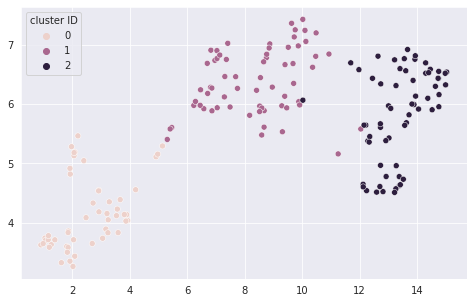

In [25]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_2[:, 0], y=embedding_2[:, 1], hue=labels_2)
plt.legend(title="cluster ID")
plt.show()

===> Results seem reasonable. Minor "overlaps".

## Attempt 3: K-means with prior dimensionality reduction via UMAP

**Reduction to 2 dimensions**

In [26]:
reducer_3 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=fixed_random_state)
embedding_3 = reducer_3.fit_transform(X)

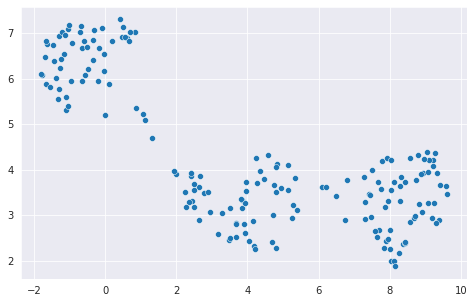

In [27]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_3[:, 0], y=embedding_3[:, 1])
plt.show()

In [28]:
X_red_3 = pd.DataFrame(embedding_3, columns=["comp_1", "comp_2"])

# sanity check
X_red_3.head()

,comp_1,comp_2
0,9.271652,4.369364
1,7.500056,3.993409
2,8.568157,2.841189
3,9.573546,3.636372
4,8.021882,1.987676


**Identifying the "optimal" number of clusters**

In [29]:
inertias_3 = []
range_clusters_3 = np.arange(2, 10, dtype=int)

for n in range_clusters_3:
    kmeans_3 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(X_red_3)
    inertias_3.append(kmeans_3.inertia_)
    
# inertias_3

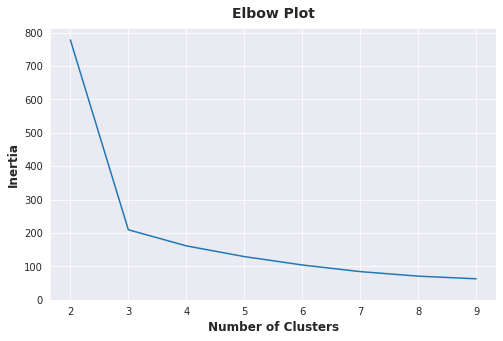

In [30]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_3, y=inertias_3)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ylim(bottom=0)
plt.show()

==> "kink" at 3 clusters

**Clustering on dataset with reduced dimensions**

In [31]:
labels_3 = KMeans(n_clusters=3, random_state=fixed_random_state).fit_predict(X_red_3)

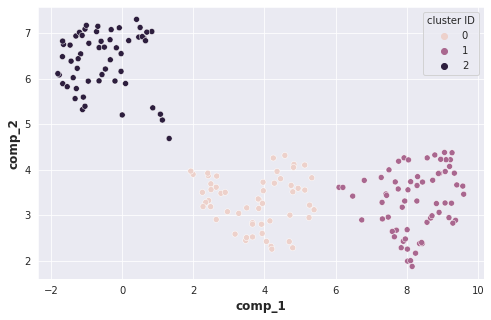

In [32]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(data=X_red_3, x="comp_1", y="comp_2", hue=labels_3)
plt.legend(title="cluster ID")
plt.show() 

===> Results seem reasonable. No "overlaps" as with the other approaches.

## Comparision of the different approaches

**Re-plotting the identified clusters by each approach side-by-side for convenience**

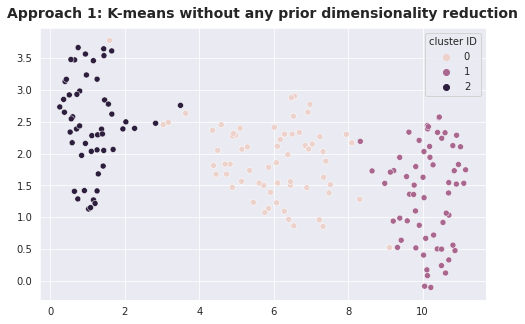

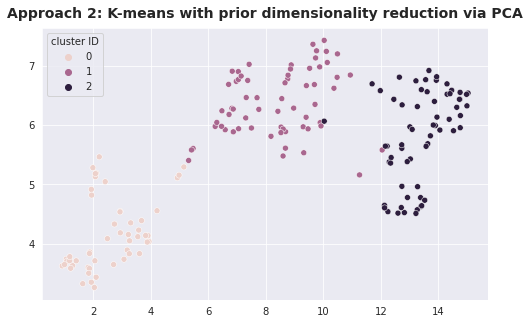

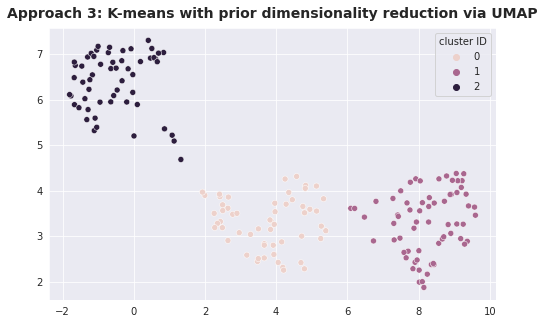

In [33]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_1[:, 0], y=embedding_1[:, 1], hue=labels_1)
plt.title("Approach 1: K-means without any prior dimensionality reduction")
plt.legend(title="cluster ID")
plt.show()

plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_2[:, 0], y=embedding_2[:, 1], hue=labels_2)
plt.title("Approach 2: K-means with prior dimensionality reduction via PCA")
plt.legend(title="cluster ID")
plt.show()

plt.figure(figsize=std_figure_size)
sns.scatterplot(data=X_red_3, x="comp_1", y="comp_2", hue=labels_3)
plt.title("Approach 3: K-means with prior dimensionality reduction via UMAP")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="cluster ID")
plt.show() 

===> All three approaches generate reasonable results, with the last one being slightly superior as it does not feature any overlaps at all.

**Comparing the elbow plots for each "optimal number of clusters" search side-by-side**

As a reminder, k-means' inertia metric is *not* normalized.

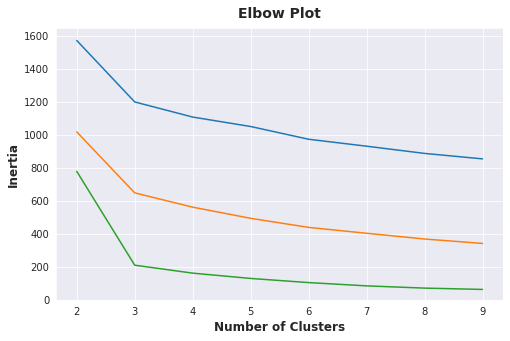

In [34]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_1, y=inertias_1)
sns.lineplot(x=range_clusters_2, y=inertias_2)
sns.lineplot(x=range_clusters_3, y=inertias_3)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ylim(bottom=0)
plt.show()

===> All 3 lines lead to the same conclusions.

**Swapping cluster IDs so to make the results for the 3 approaches directly comparable**

Taking the label IDs as generated by "approach 1" as reference.

In [35]:
def corr_labels_2(elem):
    if elem == 1:
        return 2
    elif elem == 2:
        return 1
    else:
        return elem
    

labels_2 = pd.Series(labels_2).apply(corr_labels_2)

In [36]:
def corr_labels_3(elem):
    if elem == 1:
        return 0
    elif elem == 0:
        return 1
    else:
        return elem
    

labels_3 = pd.Series(labels_3).apply(corr_labels_3)

**Side-by-side comparison of the feature distributions for each cluster across all 3 approaches** 

N.B.: Please keep in mind that each approach can "order" the cluster IDs differently, meaning that ID 0 for approach 1 might be the same as ID 2 for approach 2 and ID 1 for approach 3. As there is a quite a bit of randomness to this, I had to give up on "manually rearranging" the results so to make it easier to directly cross-compare.

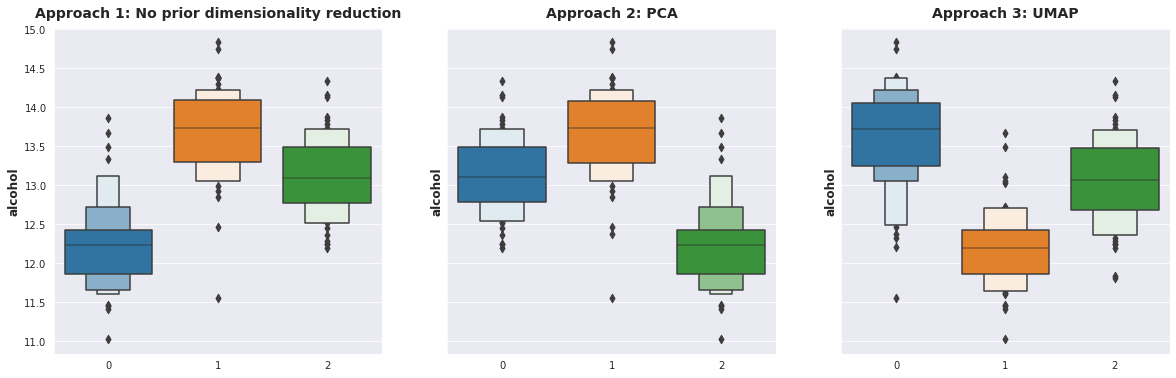

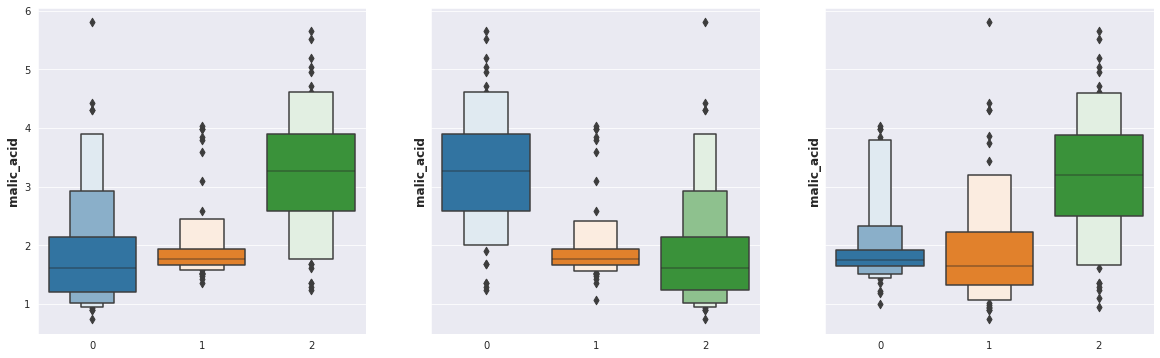

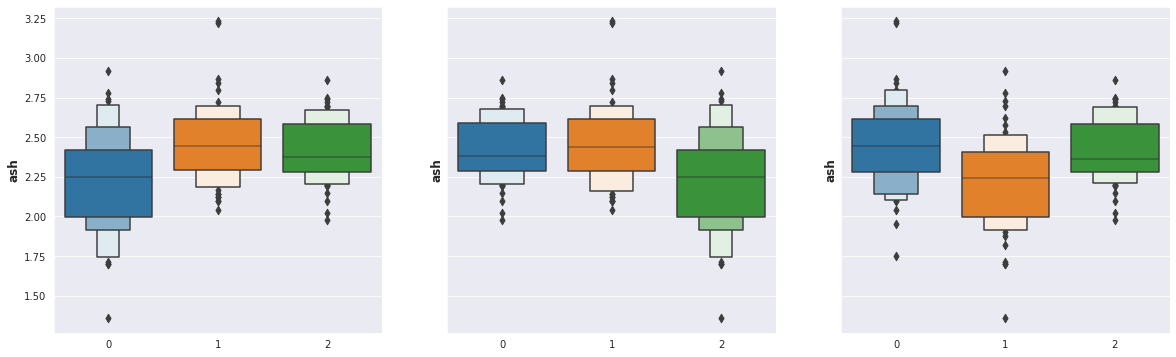

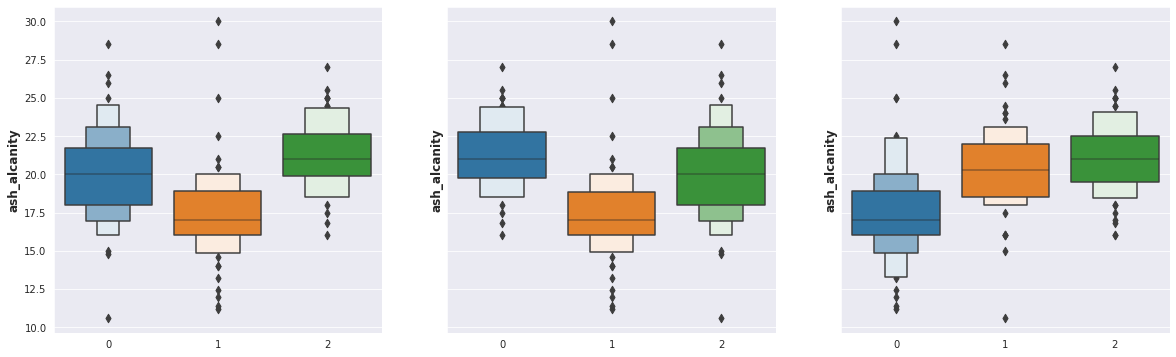

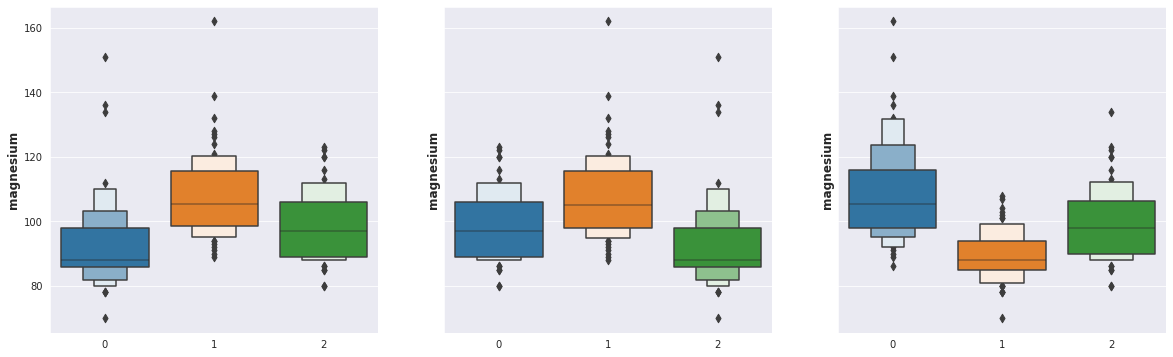

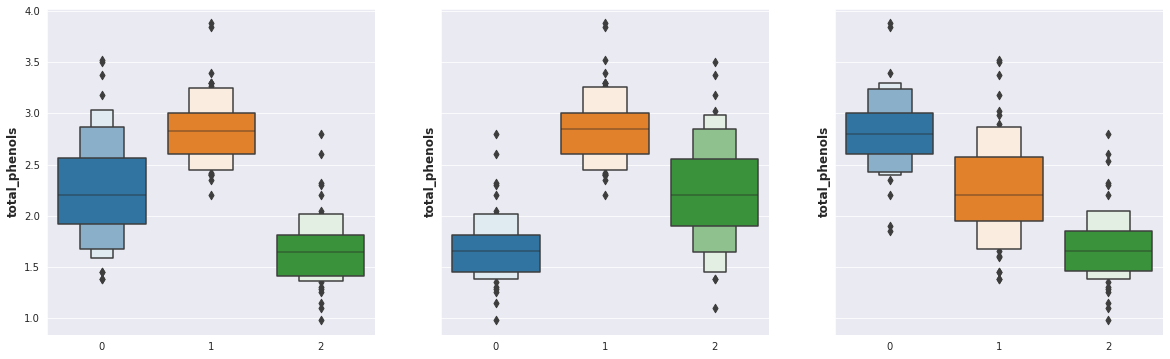

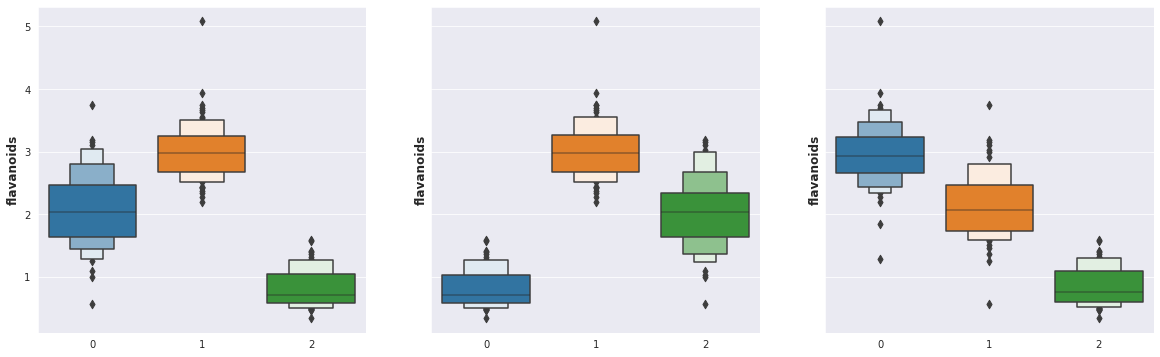

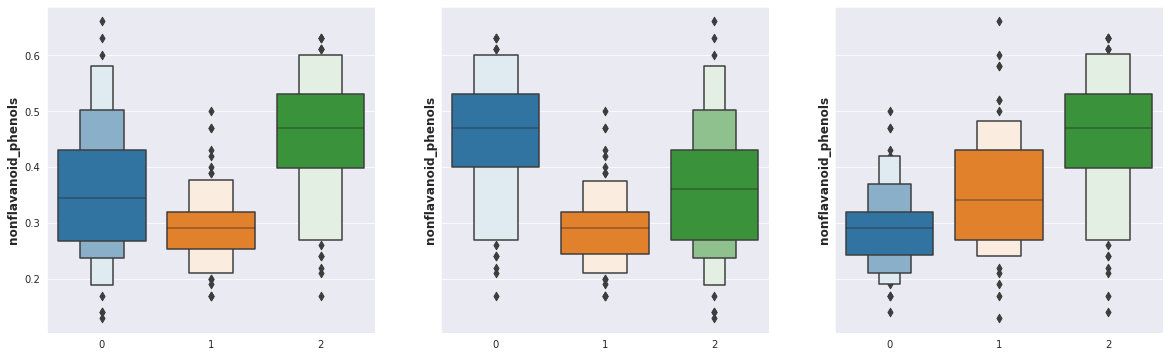

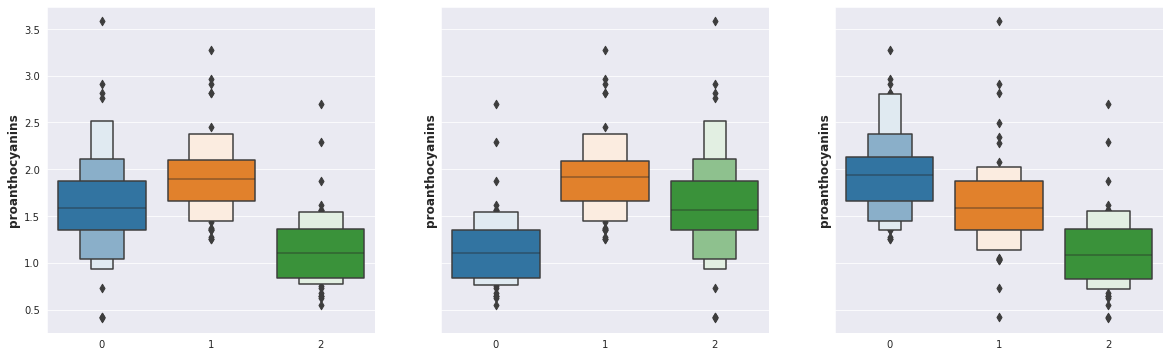

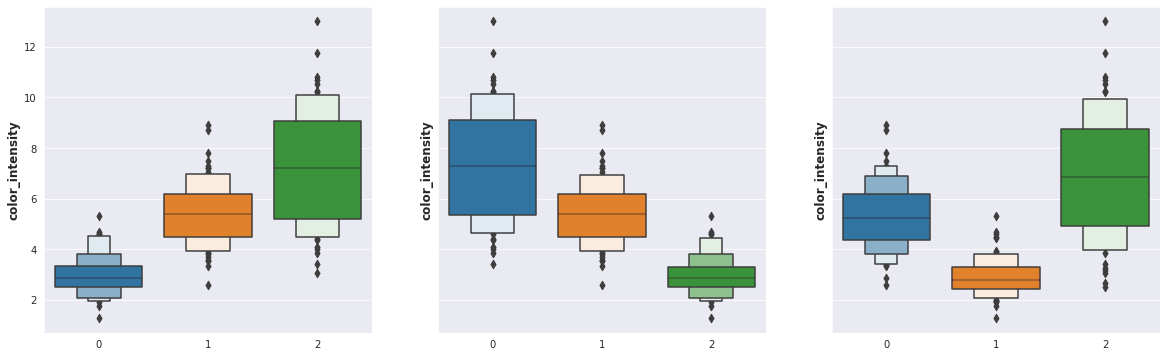

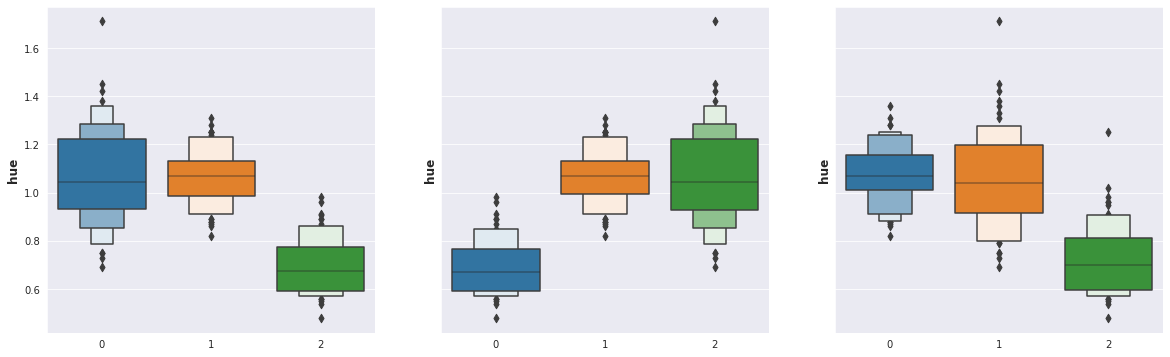

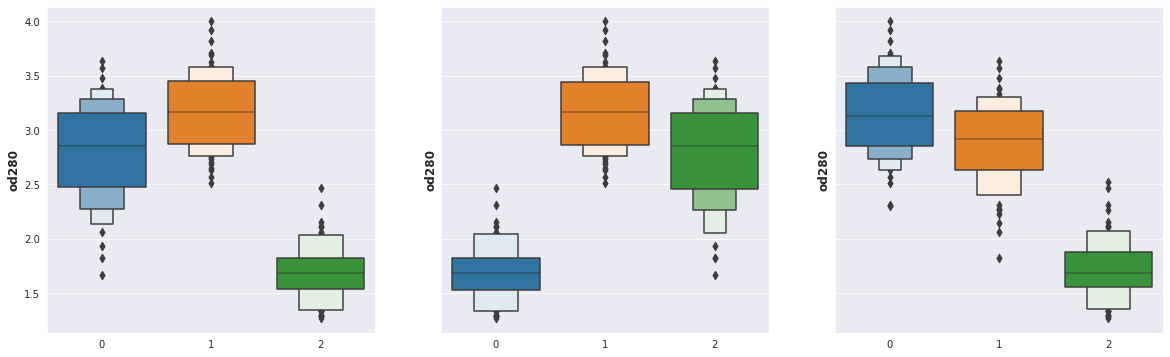

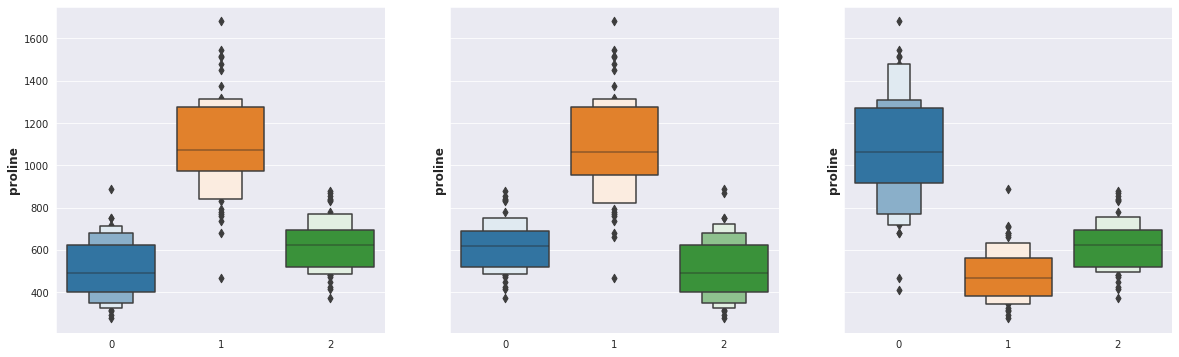

In [37]:
for i, col in enumerate(df.columns):
    fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20,6))
    sns.boxenplot(x=labels_1, y=df[col], ax=axs[0])
    sns.boxenplot(x=labels_2, y=df[col], ax=axs[1])
    sns.boxenplot(x=labels_3, y=df[col], ax=axs[2])
    if i == 0:
        axs[0].set_title("Approach 1: No prior dimensionality reduction")
        axs[1].set_title("Approach 2: PCA")
        axs[2].set_title("Approach 3: UMAP")
    plt.show()

===> Surprisingly enough, the results are *almost* identical!

**How many data points are there in each cluster for each approach?**

In [38]:
counts_1 = pd.Series(labels_1).value_counts().sort_index()
counts_2 = pd.Series(labels_2).value_counts().sort_index()
counts_3 = pd.Series(labels_3).value_counts().sort_index()

cluster_counts = pd.DataFrame({"app_1": counts_1, "app_2": counts_2, "app_3": counts_3})

cluster_counts.index.name = "cluster_id"

cluster_counts

,app_1,app_2,app_3
cluster_id,,,
0,64,51,66
1,62,63,56
2,52,64,56


===> Very similar but not identical.

# Conclusion

The results proved to be **surprisingly similar**, even more so considering that all major components of this analysis (PCA, UMAP, and K-means) have a stochastic component. This, in turn, might even explain the extent of observed differences in the above plot.
As a general caveat though, the dataset used here is very small in both, number of features and number of observations.